# Create SI figure that shows oscillatory binding curve problem & solution

In [1]:
# import libraries & packages

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader

In [2]:
# define ligand concentration array

concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])

## WT Src: Bosutinib

In [11]:
# get data for assay format 1 (need to do formats separately since protein:ligand pairs are in different wells)

# make lists for final data to be combined from various formats
data_prot = list()
data_buff = list()

# load files 
filenames = sorted(glob('infinite_results/no_dialysis/*.xml'))
filenames.sort(key=os.path.getmtime)

# read files 
reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(filenames[read])
    reads.append(read)

# extract and organize data across ligand concentration
label = 'ex280_scan_top_gain100'
well_prot = 'B7'
well_buff = 'A2'

measurements_prot = [reads[i][label][well_prot]['480'] for i in range(nreads)]
measurements_buff = [reads[i][label][well_buff]['480'] for i in range(nreads)]
for i in range(nreads):
    measurements_prot = [x if x != 'OVER' else 0 for x in measurements_prot]
    measurements_prot = [float(i) for i in measurements_prot] 
    measurements_buff = [x if x != 'OVER' else 0 for x in measurements_buff]
    measurements_buff = [float(i) for i in measurements_buff]
    
# put data into final lists
data_prot1 = list(measurements_prot)
data_buff1 = list(measurements_buff)
data_prot.append(data_prot1)
data_buff.append(data_buff1)

In [12]:
# get data for assay formats 2-4

assay_formats = ('UV', 'NB', 'COC')

# load files 
for assay_format in assay_formats:
    filenames = sorted(glob('infinite_results/%s/*.xml' %(assay_format)))
    filenames.sort(key=os.path.getmtime)

    # read files 
    reads = list()
    nreads = len(filenames)
    for read in range(nreads):
        read = platereader.read_icontrol_xml(filenames[read])
        reads.append(read)

    # extract and organize data across ligand concentration
    label = 'ex280_em480_top_gain100'
    well_prot = 'A8'
    well_buff = 'A11'

    measurements_prot = [reads[i][label][well_prot] for i in range(nreads)]
    measurements_buff = [reads[i][label][well_buff] for i in range(nreads)]
    for i in range(nreads):
        measurements_prot = [x if x != 'OVER' else 0 for x in measurements_prot]
        measurements_prot = [float(i) for i in measurements_prot] 
        measurements_buff = [x if x != 'OVER' else 0 for x in measurements_buff]
        measurements_buff = [float(i) for i in measurements_buff]

    # put data into a list so that it can be combined with data from other formats
    data_prot2 = list(measurements_prot)
    data_buff2 = list(measurements_buff)
    data_prot.append(data_prot2)
    data_buff.append(data_buff2)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


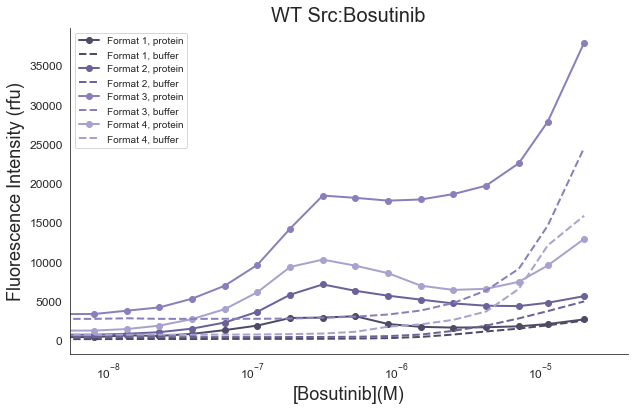

In [14]:
index = 0

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=[10,6])

current_palette = sns.color_palette('Purples_d',4)
sns.set_palette(current_palette)

x_values = concentrations

sns.set_palette(current_palette)
sns.set_style(style='white')

plates_prot = ['Format 1, protein', 'Format 2, protein', 'Format 3, protein', 'Format 4, protein']
plates_buff = ['Format 1, buffer', 'Format 2, buffer', 'Format 3, buffer', 'Format 4, buffer']

for read,j in zip(data_prot,plates_prot):
    plt.semilogx(x_values, read, linewidth=2, marker='o', label='%s' % j);
    sns.despine()

index += 1
        
index = 0
sns.set_palette(current_palette)
for read,j in zip(data_buff,plates_buff):
    plt.semilogx(x_values, read, linewidth=2, linestyle='--', label='%s' %j)   
    
plt.xlim(0,4e-5)
plt.tick_params(axis='both', which='major', labelsize=12)

# reorder legend labels so protein and buffer are together
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,4,1,5,2,6,3,7]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left')

plt.title('WT Src:Bosutinib', fontsize=20)
plt.xlabel('[Bosutinib](M)', fontsize=18)
plt.ylabel('Fluorescence Intensity (rfu)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()

index += 1


fig.savefig('20190514_oscillatory_trace_Src_Bos.pdf', bbox_inches='tight', dpi=300)
fig.savefig('20190514_oscillatory_trace_Src_Bos.svg', bbox_inches='tight', dpi=300)

## Do the same for a protein ligand pair with lower affinity (Abl GK:Gefitinib)

In [ ]:
# get data for assay format 1 (need to do formats separately since protein:ligand pairs are in different wells)

# make lists for final data to be combined from various formats
data_prot = list()
data_buff = list()

# load files 
filenames = sorted(glob('infinite_results/no_dialysis/*.xml'))
filenames.sort(key=os.path.getmtime)

# read files 
reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(filenames[read])
    reads.append(read)

# extract and organize data across ligand concentration
label = 'ex280_scan_top_gain100'
well_prot = 'H5'
well_buff = 'G2'

measurements_prot = [reads[i][label][well_prot]['480'] for i in range(nreads)]
measurements_buff = [reads[i][label][well_buff]['480'] for i in range(nreads)]
for i in range(nreads):
    measurements_prot = [x if x != 'OVER' else 0 for x in measurements_prot]
    measurements_prot = [float(i) for i in measurements_prot] 
    measurements_buff = [x if x != 'OVER' else 0 for x in measurements_buff]
    measurements_buff = [float(i) for i in measurements_buff]
    
# put data into final lists
data_prot1 = list(measurements_prot)
data_buff1 = list(measurements_buff)
data_prot.append(data_prot1)
data_buff.append(data_buff1)

In [ ]:
# get data for assay formats 2-4

assay_formats = ('UV', 'NB', 'COC')

# load files 
for assay_format in assay_formats:
    filenames = sorted(glob('infinite_results/%s/*.xml' %(assay_format)))
    filenames.sort(key=os.path.getmtime)

    # read files 
    reads = list()
    nreads = len(filenames)
    for read in range(nreads):
        read = platereader.read_icontrol_xml(filenames[read])
        reads.append(read)

    # extract and organize data across ligand concentration
    label = 'ex280_em480_top_gain100'
    well_prot = 'G5'
    well_buff = 'H5'

    measurements_prot = [reads[i][label][well_prot] for i in range(nreads)]
    measurements_buff = [reads[i][label][well_buff] for i in range(nreads)]
    for i in range(nreads):
        measurements_prot = [x if x != 'OVER' else 0 for x in measurements_prot]
        measurements_prot = [float(i) for i in measurements_prot] 
        measurements_buff = [x if x != 'OVER' else 0 for x in measurements_buff]
        measurements_buff = [float(i) for i in measurements_buff]

    # put data into a list so that it can be combined with data from other formats
    data_prot2 = list(measurements_prot)
    data_buff2 = list(measurements_buff)
    data_prot.append(data_prot2)
    data_buff.append(data_buff2)

In [ ]:
index = 0

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=[10,6])

current_palette = sns.color_palette('YlOrBr_d',4)
sns.set_palette(current_palette)

x_values = concentrations

sns.set_palette(current_palette)
sns.set_style(style='white')
sns.despine()

plates_prot = ['Format 1, protein', 'Format 2, protein', 'Format 3, protein', 'Format 4, protein']
plates_buff = ['Format 1, buffer', 'Format 2, buffer', 'Format 3, buffer', 'Format 4, buffer']

for read,j in zip(data_prot,plates_prot):
    plt.semilogx(x_values, read, linewidth=2, marker='o', label='%s' % j);

index += 1
        
index = 0
sns.set_palette(current_palette)
for read,j in zip(data_buff,plates_buff):
    plt.semilogx(x_values, read, linewidth=2, linestyle='--', label='%s' %j)   
    
plt.xlim(0,4e-5)
plt.tick_params(axis='both', which='major', labelsize=12)

# reorder legend labels so protein and buffer are together
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,4,1,5,2,6,3,7]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left')

plt.title('Abl GK:Gefitinib', fontsize=20)
plt.xlabel('[Gefitinib](M)', fontsize=18)
plt.ylabel('Fluorescence Intensity (rfu)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)

index += 1


fig.savefig('20190515_oscillatory_trace_Abl_GK_Gef.pdf', bbox_inches='tight', dpi=300)
fig.savefig('20190515_oscillatory_trace_Abl_GK_Gef.svg', bbox_inches='tight', dpi=300)

# Compare problematic & solved single well and multiple well experiments for WT Src: Bos, Bos Iso, Erl

In [3]:
# define ligand concentration arrays for multiple well (12 concentrations) and single well (17 concentrations)

concentrations_multi = np.array([  0.00000000e+00,   8.00000000e-09,   1.75e-08,
         3.83e-08,   8.37e-08,   1.83e-07,
         4e-07,   8.75e-07,   1.91e-06,
         4.18e-06,   9.15e-06,   2e-05])

concentrations_single = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])

In [4]:
# make function to load and read filenames
def read_files(assay_format):
    filenames = sorted(glob('infinite_results/%s/*.xml' %(assay_format)))
    filenames.sort(key=os.path.getmtime)
    
    reads = list()
    nreads = len(filenames)
    for read in range(nreads):
        read = platereader.read_icontrol_xml(filenames[read])
        reads.append(read)
    return(reads)

In [5]:
# for multiple well format 5, load and read data files, then extract data for WT Src & each ligand
reads_multi = read_files('multiple_well')

# Name wells and assign corresponding measurements at 480 nm based on ligand placement in plate layout

Bos_prot = np.zeros(12)
Bos_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index

    Bos_prot[well] = reads_multi[0]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'B%s' % index
    Bos_buff[well] = reads_multi[0]['ex280_scan_top_gain100'][buff_well_name]['480']

Bos_iso_prot = np.zeros(12)
Bos_iso_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'C%s' % index

    Bos_iso_prot[well] = reads_multi[1]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'D%s' % index
    Bos_iso_buff[well] = reads_multi[1]['ex280_scan_top_gain100'][buff_well_name]['480']
    
Erl_prot = np.zeros(12)
Erl_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'E%s' % index
    Erl_prot[well] = reads_multi[2]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'F%s' % index
    Erl_buff[well] = reads_multi[2]['ex280_scan_top_gain100'][buff_well_name]['480']

In [6]:
# extract data for single well format 2, break up into each ligand to mirror multiple well data extraction 

reads_single = read_files('single_well')

label_single = 'ex280_scan_top_gain100'

# get protein data
measurements_single_prot = list()
prot_well_dict = {'Bos': 'B8', 'Bos Iso': 'D8', 'Erl' :'F8'}
for lig, well in prot_well_dict.items():
    measurements = [reads_single[i][label_single][well]['480'] for i in range(17)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_single_prot.append(measurements)

# get buffer data
measurements_single_buff = list()
buff_well_dict = {'Bos':'A2', 'Bos_iso':'C2', 'Erl':'E2'}
for lig, well in buff_well_dict.items():
    measurements = [reads_single[i][label_single][well]['480'] for i in range(17)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_single_buff.append(measurements)

In [7]:
# for multiple well format 5, load and read data files, then extract data for WT Src & each ligand
reads_multi = read_files('multiple_well_NB')

# Name wells and assign corresponding measurements at 480 nm based on ligand placement in plate layout

Bos_prot_NB = np.zeros(12)
Bos_buff_NB = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index

    Bos_prot_NB[well] = reads_multi[0]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'B%s' % index
    Bos_buff_NB[well] = reads_multi[0]['ex280_scan_top_gain100'][buff_well_name]['480']

Bos_iso_prot_NB = np.zeros(12)
Bos_iso_buff_NB = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'C%s' % index

    Bos_iso_prot_NB[well] = reads_multi[1]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'D%s' % index
    Bos_iso_buff_NB[well] = reads_multi[1]['ex280_scan_top_gain100'][buff_well_name]['480']
    
Erl_prot_NB = np.zeros(12)
Erl_buff_NB = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'E%s' % index
    Erl_prot_NB[well] = reads_multi[2]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'F%s' % index
    Erl_buff_NB[well] = reads_multi[2]['ex280_scan_top_gain100'][buff_well_name]['480']

In [8]:
# extract data for solved single well, break up into each ligand to mirror multiple well data extraction 

reads_single = read_files('solved_single_well')

label_single = 'ex280_em480_top_gain100'

# get protein data
measurements_solved_single_prot = list()
prot_well_dict = {'Bos': 'B8', 'Bos Iso': 'D8', 'Erl' :'F8'}
for lig, well in prot_well_dict.items():
    measurements = [reads_single[i][label_single][well] for i in range(17)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_solved_single_prot.append(measurements)

# get buffer data
measurements_solved_single_buff = list()
buff_well_dict = {'Bos':'A2', 'Bos_iso':'C2', 'Erl':'E2'}
for lig, well in buff_well_dict.items():
    measurements = [reads_single[i][label_single][well] for i in range(17)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_solved_single_buff.append(measurements)

In [9]:
# create plotting function

def plot(color, single_prot, single_buff, lig_num, lig_prot, lig_buff, title, single_format, multi_format):
    current_palette = sns.color_palette(color)
    
    plt.semilogx(concentrations_single, single_prot[lig_num], c=current_palette[1], marker='.', linewidth=3, markersize=16, alpha=0.8)
    plt.semilogx(concentrations_single, single_buff[lig_num], c=current_palette[1], linestyle='--', linewidth=3, alpha=0.8)
    plt.semilogx(concentrations_multi, np.flip(lig_prot, axis=0), c=current_palette[4], marker='.', linewidth=3, markersize=16, alpha=0.8)
    plt.semilogx(concentrations_multi, np.flip(lig_buff, axis=0), c=current_palette[4], linestyle='--', linewidth=3, alpha=0.8)
    ax1.set_ylim(10**2, 60000)

    ax1.yaxis.set_tick_params(labelsize=18)
    ax1.xaxis.set_tick_params(labelsize=18)
    plt.minorticks_off()
    plt.legend(['Format %s: protein' %(single_format), 'Format %s: buffer' %(single_format), 'Format %s: protein' %(multi_format), 'Format %s: buffer' %(multi_format)], loc=2, prop={'size': 16})
    plt.title(title, fontsize=28)
    
    sns.set_style(style='white')
    sns.despine()

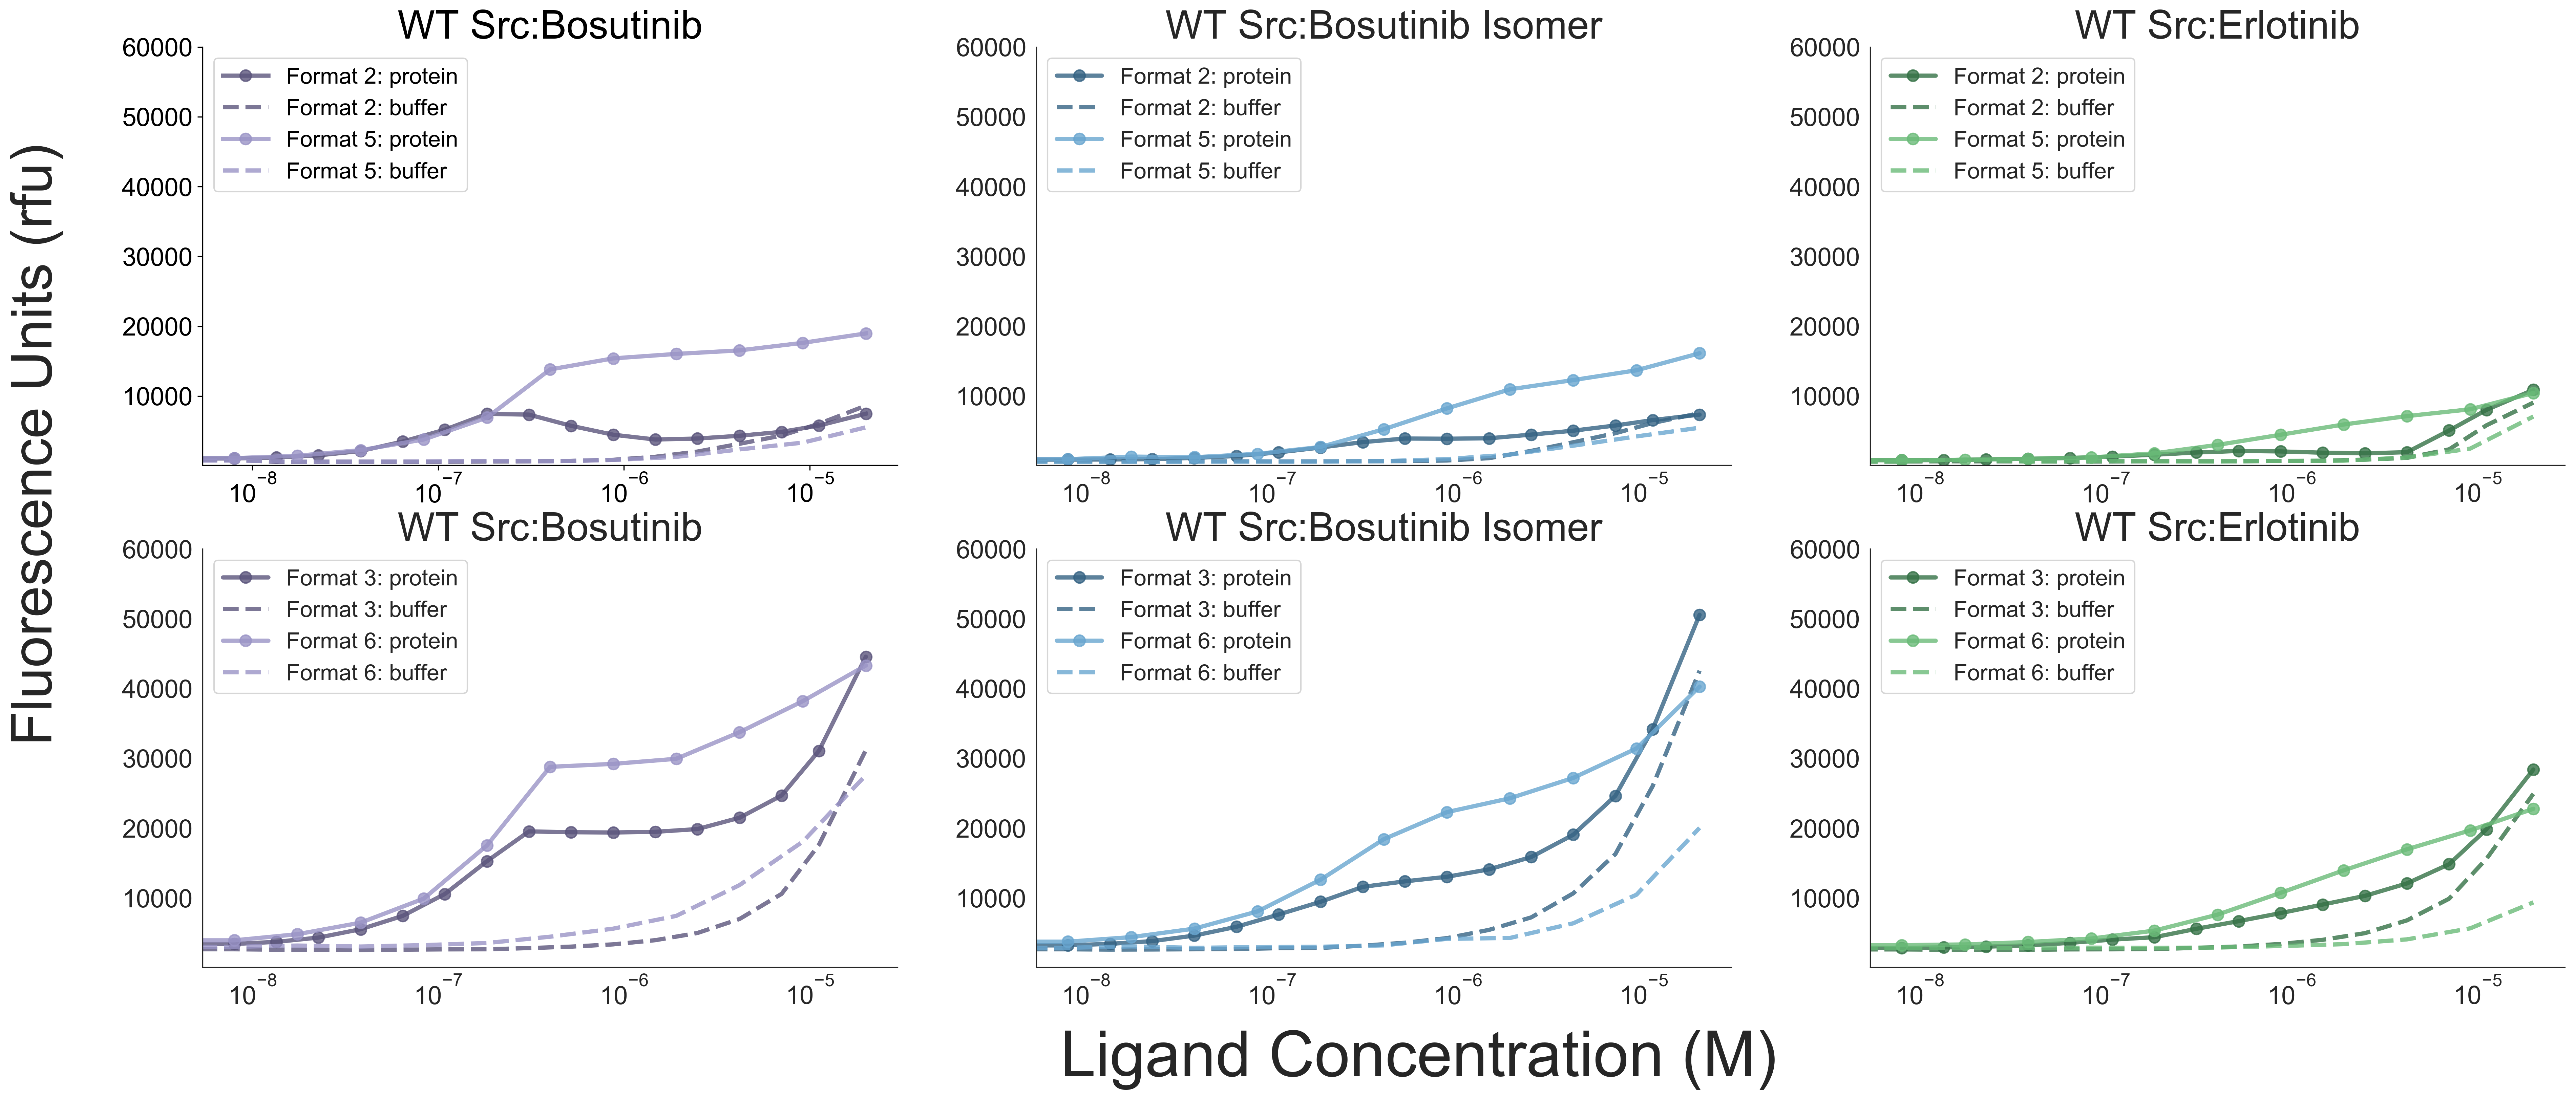

In [10]:
## make 6 plots, one for each ligand at 480 nm Em

fig = plt.figure(figsize=(30,12), dpi=300)

ax1 = fig.add_subplot(2,3,1)
Src_bos_initial = plot(color='Purples_d', single_prot=measurements_single_prot, single_buff=measurements_single_buff, lig_num=0, lig_prot=Bos_prot, lig_buff=Bos_buff, title='WT Src:Bosutinib', single_format='2', multi_format='5')

ax1 = fig.add_subplot(2,3,2)
Src_bos_iso_initial = plot(color='Blues_d', single_prot=measurements_single_prot, single_buff=measurements_single_buff, lig_num=1, lig_prot=Bos_iso_prot, lig_buff=Bos_iso_buff, title='WT Src:Bosutinib Isomer', single_format='2', multi_format='5')

ax1 = fig.add_subplot(2,3,3)
Src_erl_initial = plot(color='Greens_d', single_prot=measurements_single_prot, single_buff=measurements_single_buff, lig_num=2, lig_prot=Erl_prot, lig_buff=Erl_buff, title='WT Src:Erlotinib', single_format='2', multi_format='5')

ax1 = fig.add_subplot(2,3,4)
Src_bos_solved = plot(color='Purples_d', single_prot=measurements_solved_single_prot, single_buff=measurements_solved_single_buff, lig_num=0, lig_prot=Bos_prot_NB, lig_buff=Bos_buff_NB, title='WT Src:Bosutinib', single_format='3', multi_format='6')

ax1 = fig.add_subplot(2,3,5)
Src_bos_iso_solved = plot(color='Blues_d', single_prot=measurements_solved_single_prot, single_buff=measurements_solved_single_buff, lig_num=1, lig_prot=Bos_iso_prot_NB, lig_buff=Bos_iso_buff_NB, title='WT Src:Bosutinib Isomer', single_format='3', multi_format='6')

ax1 = fig.add_subplot(2,3,6)
Src_erl_solved = plot(color='Greens_d', single_prot=measurements_solved_single_prot, single_buff=measurements_solved_single_buff, lig_num=2, lig_prot=Erl_prot_NB, lig_buff=Erl_buff_NB, title='WT Src:Erlotinib', single_format='3', multi_format='6')

axis = plt.gca()
plt.ylabel('Fluorescence Units (rfu)', fontsize=40)
axis.yaxis.set_label_coords(-2.6,1.25)
plt.xlabel('Ligand Concentration (M)', fontsize=45)
axis.xaxis.set_label_coords(-0.65,-0.15)

fig.savefig('20190517_rfu_comparison_multi_vs_single_WT Src_dialyzed.pdf', dpi=300, bbox='tight')
fig.savefig('20190517_rfu_comparison_multi_vs_single_WT Src_dialyzed.svg', dpi=300, bbox='tight')